                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            WLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2263.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.59e-69
Time:                        22:03:09   Log-Likelihood:                -208.97
No. Observations:                 100   AIC:                             421.9
Df Residuals:                      98   BIC:                             427.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9347      0.158     12.221      0.0

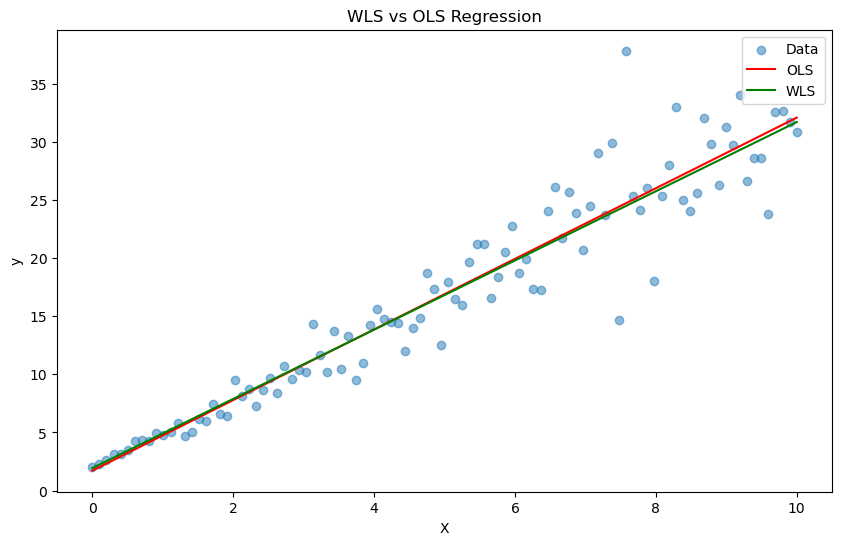

OLS coefficients: const    1.710131
X        3.037777
dtype: float64
WLS coefficients: const    1.934722
X        2.977107
dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import WLS
from statsmodels.tools import add_constant

# Generate sample data with heteroscedasticity and outliers
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 + 3*X + np.random.normal(0, 0.5*X)  # Heteroscedastic errors
y[75] += 10  # Add an outlier

# Create a DataFrame
df = pd.DataFrame({'X': X, 'y': y})

# Calculate weights (inverse of variance)
weights = 1 / (X + 1)**2

# Prepare the data for statsmodels (add constant term for intercept)
X = add_constant(df['X'])

# Fit WLS model
wls_model = WLS(df['y'], X, weights=weights).fit()

# Fit OLS model for comparison
from statsmodels.regression.linear_model import OLS
ols_model = OLS(df['y'], X).fit()

# Print summary of WLS model
print(wls_model.summary())

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['y'], alpha=0.5, label='Data')
plt.plot(df['X'], ols_model.predict(X), color='red', label='OLS')
plt.plot(df['X'], wls_model.predict(X), color='green', label='WLS')
plt.legend()
plt.title('WLS vs OLS Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Print coefficients for comparison
print("OLS coefficients:", ols_model.params)
print("WLS coefficients:", wls_model.params)


#### Explanation of the Code:
##### Data Generation:
- A synthetic dataset is created where y is linearly related to X with added noise.
- Some observations are artificially increased (outliers) to simulate an imbalanced dataset.
##### Weights Assignment:
- Weights are assigned such that outliers have a higher weight (5 in this case), indicating their importance during model fitting.
##### Model Fitting:
- The Lasso model from scikit-learn is fitted to the training data using the sample_weight parameter to incorporate the weights.
##### Evaluation:
- The Mean Squared Error (MSE) is calculated to evaluate model performance on the test set.
##### Visualization:
- A scatter plot shows the original data points and the predictions made by the Weighted Lasso model.
##### Note:
- The sample_weight parameter in Lasso allows you to specify weights for each sample during fitting.
Adjust the alpha parameter for regularization strength based on your specific dataset and problem context.

Mean Squared Error: 66.98206353188648
Lasso Coefficients: [2.51362233]


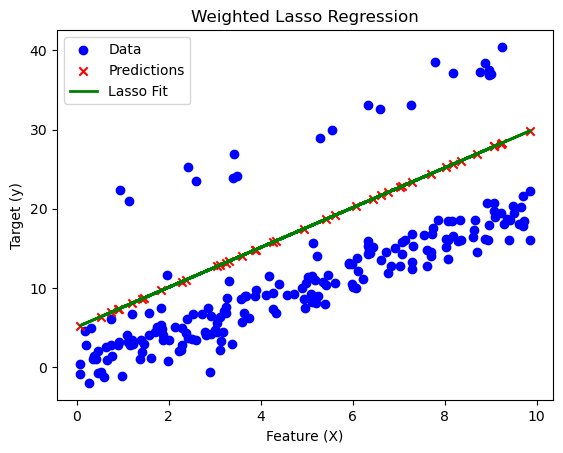

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 1) * 10  # Feature
y = 2 * X.squeeze() + np.random.randn(n_samples) * 2  # Linear relation with noise

# Create an imbalanced dataset by adding few outliers
y[180:] += 20  # Adding outliers to create imbalance

# Step 2: Assign weights (higher for outliers)
weights = np.ones(n_samples)
weights[180:] = 5  # Assign higher weight to outliers

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42)

# Step 4: Fit Weighted Lasso Regression
lasso = Lasso(alpha=0.1)  # Regularization parameter
lasso.fit(X_train, y_train, sample_weight=weights_train)

# Step 5: Predictions and evaluation
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Lasso Coefficients:", lasso.coef_)

# Step 6: Plotting results
plt.scatter(X, y, color='blue', label='Data')
plt.scatter(X_test, y_pred, color='red', label='Predictions', marker='x')
plt.plot(X_test, y_pred, color='green', label='Lasso Fit', linewidth=2)
plt.title('Weighted Lasso Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


In [3]:
lasso.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

#### Explanation of the Code:
- Data Generation: A synthetic dataset is created where y is linearly related to X with added noise. Some observations are artificially increased (outliers) to simulate an imbalanced dataset.
- Weights Assignment: Weights are assigned such that outliers have a higher weight (5 in this case), indicating their importance during model fitting.
- Data Splitting: The dataset is split into training and testing sets.
- Scaling: The features and target variable are scaled by the square root of the weights to account for their influence during fitting.
- Model Fitting: The Lasso model from sklearn is fitted to the weighted training data.
- Predictions and Visualization: Predictions are made on the test set and visualized alongside the original data.
This approach effectively incorporates weights into Lasso regression by transforming the data accordingly, allowing you to handle imbalanced datasets while benefiting from Lasso's regularization properties.

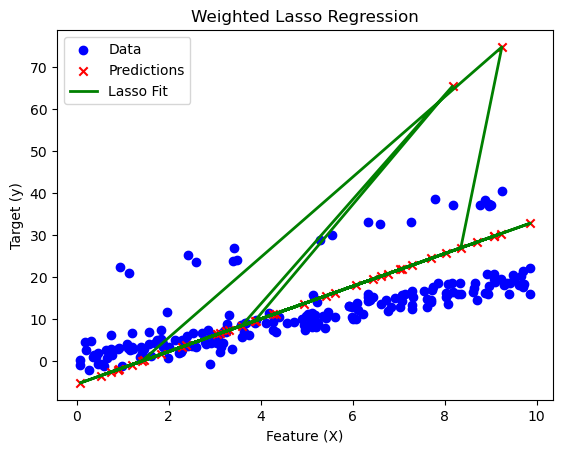

Lasso Coefficients: [3.88396243]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 1) * 10  # Feature
y = 2 * X.squeeze() + np.random.randn(n_samples) * 2  # Linear relation with noise

# Create an imbalanced dataset by adding few outliers
y[180:] += 20  # Adding outliers to create imbalance

# Assign weights (higher for outliers)
weights = np.ones(n_samples)
weights[180:] = 5  # Assign higher weight to outliers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42)

# Scale the features and target by the square root of the weights
X_train_weighted = X_train * np.sqrt(weights_train[:, np.newaxis])
y_train_weighted = y_train * np.sqrt(weights_train)

# Fit Weighted Lasso Regression
lasso = Lasso(alpha=0.1)  # Regularization parameter
lasso.fit(X_train_weighted, y_train_weighted)

# Predictions on test set (scale back)
X_test_weighted = X_test * np.sqrt(weights_test[:, np.newaxis])
y_pred_weighted = lasso.predict(X_test_weighted)

# Evaluate and plot results
plt.scatter(X, y, color='blue', label='Data')
plt.scatter(X_test, y_pred_weighted, color='red', label='Predictions', marker='x')
plt.plot(X_test, y_pred_weighted, color='green', label='Lasso Fit', linewidth=2)
plt.title('Weighted Lasso Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

print("Lasso Coefficients:", lasso.coef_)


#### Explanation of the Code:
- Data Loading:
    - The diabetes dataset is loaded using load_diabetes(), which returns feature data X and target variable y.
- Data Splitting:
    - The dataset is split into training and testing sets using train_test_split().
- Feature Standardization:
    - Features are standardized using StandardScaler(), which is crucial for models like Lasso that are sensitive to feature scales.
- Model Fitting:
    - A Lasso regression model is created and fitted to the scaled training data. The alpha parameter controls the regularization strength; you can adjust this value based on your specific needs.
- Feature Selection:
    - The coefficients from the fitted model are examined. Features with non-zero coefficients are considered important, while those with zero coefficients are discarded.
- Output:
    - The code will print out the selected features (those with non-zero coefficients) and the discarded features (those with zero coefficients), demonstrating how Lasso regression can effectively perform feature selection. This approach allows you to reduce dimensionality while retaining only the most relevant predictors for your analysis or modeling tasks.

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can tune alpha for better results
lasso.fit(X_train_scaled, y_train)

# Step 5: Get the coefficients and identify important features
importance = lasso.coef_
selected_features = np.array(features)[importance != 0]
discarded_features = np.array(features)[importance == 0]

# Output selected and discarded features
print("Selected Features:", selected_features)
print("Discarded Features:", discarded_features)


Selected Features: ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
Discarded Features: []


In [6]:
lasso.coef_

array([  1.73045056, -11.31635911,  25.82462699,  16.64425156,
       -29.35841191,  13.27584411,   0.5479479 ,  10.23616805,
        29.63282611,   2.39347521])

#### Explanation:
- Data Preparation: The diabetes dataset is loaded and split into training and testing sets.
- Standardization: Features are standardized for better performance of Lasso.
- Parameter Grid Setup: A range of alpha values is created using np.logspace().
- Grid Search: GridSearchCV is used to perform cross-validation and find the best alpha.
- Results: The best alpha value is printed along with the indices of selected features based on non-zero coefficients.
- This process allows you to systematically tune the alpha parameter in Lasso regression for effective feature selection while ensuring that you achieve optimal model performance.


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for alpha
param_grid = {'alpha': np.logspace(-4, 1, 100)}  # Testing values from 0.0001 to 10

# Set up Grid Search with cross-validation
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Fit the Lasso model with the best alpha
best_lasso = grid_search.best_estimator_
coefficients = best_lasso.coef_

# Identify selected features
selected_features = np.where(coefficients != 0)[0]
print("Selected Features Indices:", selected_features)


Best Alpha: 1.5556761439304723
Selected Features Indices: [1 2 3 4 6 8 9]


#### Explanation of the Code:
- Data Loading: The Housing dataset is loaded using load_boston().
- Data Splitting: The dataset is split into training and testing sets.
- Feature Standardization: Features are standardized using StandardScaler().
- Alpha Values: A range of alpha values is generated using np.logspace().
- Model Fitting: A loop fits a Lasso model for each alpha value and stores the coefficients.
- Plotting: Coefficients are plotted against the log-scaled alpha values to visualize how they change with regularization.
- Visualization Insights:
- Features with non-zero coefficients at lower alpha values indicate their importance.
- As alpha increases, some features may have their coefficients shrink to zero, indicating they are no longer selected by the model.
- The plot helps identify which features remain significant as regularization increases.
- This method provides a clear visual representation of how different levels of regularization affect feature selection in Lasso regression.

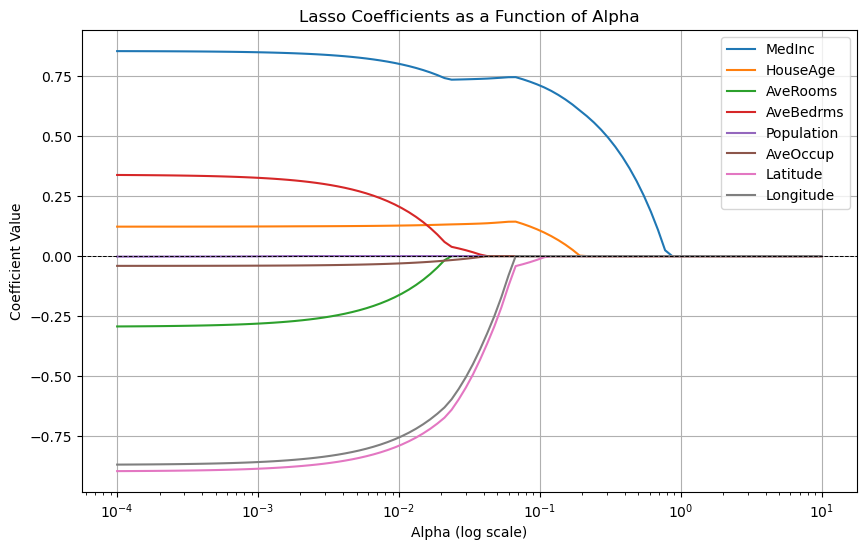

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
features = california.feature_names

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up a range of alpha values
alphas = np.logspace(-4, 1, 100)  # Alpha values from 0.0001 to 10

# Initialize a list to store coefficients
coefs = []

# Fit Lasso models for each alpha and store coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

# Convert coefficients to a NumPy array for easier indexing
coefs = np.array(coefs)

# Plotting the coefficients against alpha values
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=features[i])

plt.xscale('log')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.title('Lasso Coefficients as a Function of Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### Lasso regression is particularly well-suited for handling high-dimensional datasets effectively due to its inherent feature selection capabilities. Here are some key points regarding how Lasso manages high-dimensional data:
1. Automatic Feature Selection: Lasso applies L1 regularization, which adds a penalty equivalent to the absolute value of the coefficients to the loss function. This penalty encourages sparsity in the model, meaning that it can shrink some coefficients exactly to zero. As a result, Lasso effectively eliminates less important features from the model, making it ideal for high-dimensional datasets where the number of predictors exceeds the number of observations.
2. Dimensionality Reduction: In high-dimensional settings, Lasso helps reduce dimensionality by selecting a smaller subset of relevant features while discarding irrelevant ones. This is crucial because high dimensionality can lead to overfitting and poor generalization of models.
3. Handling Multicollinearity: Lasso can manage multicollinearity among predictors by arbitrarily selecting one feature from a group of correlated features while setting others to zero. Although it may not handle severe multicollinearity effectively, it still provides a more interpretable model compared to methods that retain all features.
4. Bias-Variance Tradeoff: The regularization parameter (alpha) in Lasso controls the tradeoff between bias and variance. By adjusting alpha, you can balance the complexity of the model and its predictive performance, which is particularly important in high-dimensional contexts where overfitting is a concern.
5. Model Interpretability: By reducing the number of features to those that are most relevant, Lasso enhances model interpretability. This is especially beneficial in high-dimensional datasets where understanding relationships between variables is critical.
6. Complementary Techniques: While Lasso is effective for automatic feature selection, in very high-dimensional scenarios, it may be beneficial to combine it with other techniques such as Elastic Net or initial feature screening methods to enhance performance further 3. Elastic Net combines both L1 and L2 penalties and can be more robust in situations with highly correlated features.
#### In summary, Lasso regression is a powerful tool for managing high-dimensional datasets due to its ability to perform automatic feature selection, reduce dimensionality, and improve model interpretability while addressing issues related to multicollinearity and overfitting.

#### Key Concepts
##### Bias:
- Bias refers to the error introduced by approximating a real-world problem, which may be complex, using a simplified model. High bias can cause an algorithm to miss the relevant relations between features and target outputs, leading to underfitting.
Models with high bias are typically too simple (e.g., linear models applied to non-linear data) and fail to capture the underlying patterns in the data.
##### Variance:
- Variance measures how much the model's predictions change when it is trained on different subsets of data. High variance can cause an algorithm to model the random noise in the training data rather than the intended outputs, leading to overfitting.
Models with high variance are often too complex (e.g., high-degree polynomial regression) and capture noise along with the underlying pattern.

##### The Trade-off
###### As model complexity increases:
- Bias decreases: The model becomes more flexible and can fit the training data better.
- Variance increases: The model becomes sensitive to fluctuations in the training data and may not generalize well to new data.
###### Conversely, as model complexity decreases:
- Bias increases: The model becomes less flexible and may not capture all relevant patterns.
- Variance decreases: The model becomes more stable across different datasets but may miss important trends.

#### When to Use Elastic Net
- Multicollinearity: Elastic Net performs better than Ridge or Lasso alone when features are highly correlated.
- Feature Selection: Elastic Net performs feature selection while retaining stability in coefficient estimates due to L2 regularization.
- Trade-off Flexibility: By adjusting 𝜌, you can control the balance between Lasso and Ridge penalties.
- Elastic Net is a versatile and robust choice for regression problems where both feature selection and handling multicollinearity are important.

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


# Create synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # l1_ratio is \(\rho\)

# Fit the model
elastic_net.fit(X_train, y_train)

# Predict on test set
y_pred = elastic_net.predict(X_test)


In [9]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2372.23
R^2 Score: 0.87


In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize Elastic Net
elastic_net = ElasticNet(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Mean Squared Error: {mse:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)


Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Best R^2 Score: 0.9998362720811725


In [12]:
# Predict on test set
y_pred = grid_search.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2.92
R^2 Score: 1.00
